In [107]:
import pennylane as qml

from functools import partial

from pennylane import numpy as np
from pennylane.fourier import coefficients, circuit_spectrum
from pennylane.fourier.visualize import *

import matplotlib.pyplot as plt

In [108]:
weights = np.array([0.1, 0.2, 0.3])

In [109]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit_with_weights(w, x):
    qml.RX(x, wires=0)

    qml.Hadamard(wires=0)

    qml.Rot(*w, wires=0)
    
    return qml.expval(qml.PauliZ(0))

array([<Axes: ylabel='real'>, <Axes: ylabel='imag'>], dtype=object)

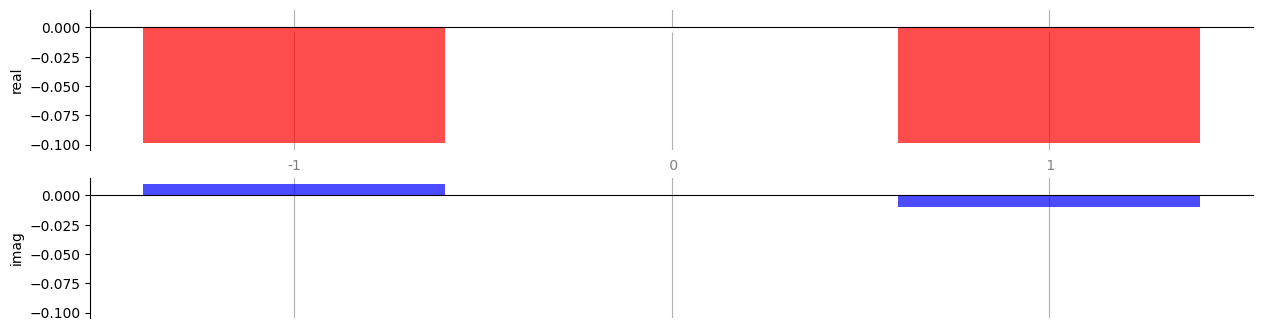

In [110]:
coeffs = coefficients(partial(circuit_with_weights, weights), 1, 1)

# Number of inputs is now 2; pass custom colours as well
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 4))
bar(coeffs, 1, ax, colour_dict={"real" : "red", "imag" : "blue"})

In [111]:
omega = np.arange(0, len(coeffs))

In [112]:
x = 0.1

In [115]:
f_x_fft = 0
for i, coeff in enumerate(coeffs):
    print(f"Coefficient c_-{omega[i]}=c_+{omega[i]} = {coeff}")
    f_x_fft += coeff * np.exp(-1j*x*omega[i])

print(np.real(f_x_fft))

Coefficient c_-0=c_+0 = 0j
Coefficient c_-1=c_+1 = (-0.0988384058270419-0.009916919038104877j)
Coefficient c_-2=c_+2 = (-0.0988384058270419+0.009916919038104877j)
-0.19423269588687425


In [114]:
circuit_with_weights(weights, x)

tensor(-0.19470917, requires_grad=True)